<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/BT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fe223719a1d65eb48c12ab36db5f2851c56684976f0a64bd813e897decd7445a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf(x,[0,0,5])
print(x)
print(mfx)



[ 0  1  2  3  4  5  6  7  8  9 10]
[1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]


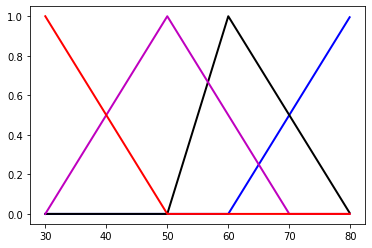

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x , full_speed , 'b' , linewidth = 2 , label = 'full speed' )
plt.plot(x , medium_fast , 'k' , linewidth = 2 , label = 'medium fast' )
plt.plot(x , medium , 'm' , linewidth = 2 , label = 'medium' )
plt.plot(x , slow , 'r' , linewidth = 2 , label = 'slow' )

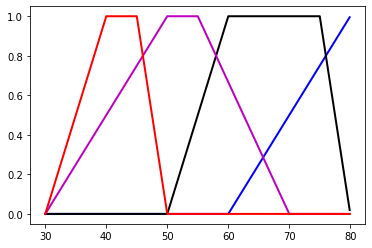

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,40,45,50])
medium = fuzz.trapmf(x,[30,50,55,70])
medium_fast = fuzz.trapmf(x,[50,60,75,80])
full_speed = fuzz.trapmf(x,[60,80,80,80])
plt.figure()
plt.plot(x , full_speed , 'b' , linewidth = 2 , label = 'full speed' )
plt.plot(x , medium_fast , 'k' , linewidth = 2 , label = 'medium fast' )
plt.plot(x , medium , 'm' , linewidth = 2 , label = 'medium' )
plt.plot(x , slow , 'r' , linewidth = 2 , label = 'slow' )

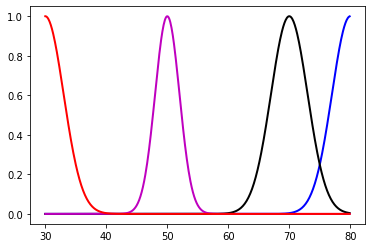

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,30,3)
medium = fuzz.gaussmf(x,50,2)
medium_fast = fuzz.gaussmf(x,70,3)
full_speed = fuzz.gaussmf(x,80,3)
plt.figure()
plt.plot(x , full_speed , 'b' , linewidth = 2 , label = 'full speed' )
plt.plot(x , medium_fast , 'k' , linewidth = 2 , label = 'medium fast' )
plt.plot(x , medium , 'm' , linewidth = 2 , label = 'medium' )
plt.plot(x , slow , 'r' , linewidth = 2 , label = 'slow' )

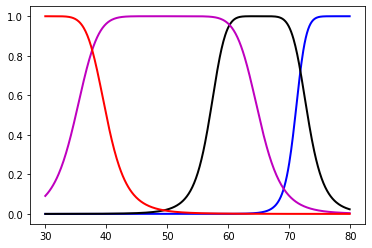

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,10,3,30)
medium = fuzz.gbellmf(x,15,4,50)
medium_fast = fuzz.gbellmf(x,8,3,65)
full_speed = fuzz.gbellmf(x,9,5,80)
plt.figure()
plt.plot(x , full_speed , 'b' , linewidth = 2 , label = 'full speed' )
plt.plot(x , medium_fast , 'k' , linewidth = 2 , label = 'medium fast' )
plt.plot(x , medium , 'm' , linewidth = 2 , label = 'medium' )
plt.plot(x , slow , 'r' , linewidth = 2 , label = 'slow' )

25.515706032513773


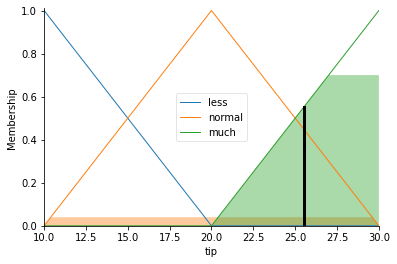

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crtl 

food = crtl.Antecedent(np.arange(0,11,1),'food')        # input
service = crtl.Antecedent(np.arange(0,11,1),'service')  # input
tip = crtl.Consequent(np.arange(10,31,1),'tip')         # output

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['normal'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['normal'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

rule1 = crtl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = crtl.Rule(food['poor']&service['normal'],tip['less'])
rule3 = crtl.Rule(food['poor']&service['good'],tip['normal'])
rule4 = crtl.Rule(food['normal']&service['poor'],tip['less'])
rule5 = crtl.Rule(food['normal']&service['normal'],tip['normal'])
rule6 = crtl.Rule(food['normal']&service['good'],tip['much'])
rule7 = crtl.Rule(food['good']&service['poor'],tip['normal'])
rule8 = crtl.Rule(food['good']&service['normal'],tip['much'])
rule9 = crtl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = crtl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = crtl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)



62.476411570071505


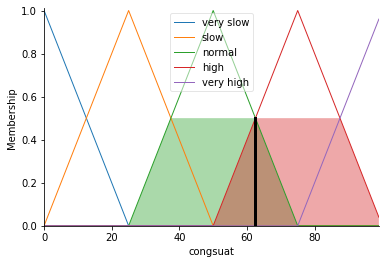

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crtl 

tgian = crtl.Antecedent(np.arange(10,180,1),'tgian')        # input
soluong = crtl.Antecedent(np.arange(200,1000,1),'soluong')  # input
congsuat = crtl.Consequent(np.arange(0,100,1),'congsuat')         # output

tgian['very fast'] = fuzz.trimf(tgian.universe,[10,10,30])
tgian['fast'] = fuzz.trimf(tgian.universe,[10,30,60])
tgian['normal'] = fuzz.trimf(tgian.universe,[30,60,120])
tgian['slow'] = fuzz.trimf(tgian.universe,[60,120,180])
tgian['very slow'] = fuzz.trimf(tgian.universe,[120,180,180])

soluong['very little'] = fuzz.trimf(soluong.universe,[200,200,400])
soluong['little'] = fuzz.trimf(soluong.universe,[200,400,600])
soluong['normal'] = fuzz.trimf(soluong.universe,[400,600,800])
soluong['much'] = fuzz.trimf(soluong.universe,[600,800,1000])
soluong['so much'] = fuzz.trimf(soluong.universe,[800,1000,1000])

congsuat['very slow'] = fuzz.trimf(congsuat.universe,[0,0,25])
congsuat['slow'] = fuzz.trimf(congsuat.universe,[0,25,50])
congsuat['normal'] = fuzz.trimf(congsuat.universe,[25,50,75])
congsuat['high'] = fuzz.trimf(congsuat.universe,[50,75,100])
congsuat['very high'] = fuzz.trimf(congsuat.universe,[75,100,100])

rule1 = crtl.Rule(tgian['very fast']&soluong['very little'],congsuat['normal'])
rule2 = crtl.Rule(tgian['very fast']&soluong['little'],congsuat['high'])
rule3 = crtl.Rule(tgian['very fast']&soluong['normal'],congsuat['very high'])
rule4 = crtl.Rule(tgian['very fast']&soluong['much'],congsuat['very high'])
rule5 = crtl.Rule(tgian['very fast']&soluong['so much'],congsuat['very high'])
rule6 = crtl.Rule(tgian['fast']&soluong['very little'],congsuat['slow'])
rule7 = crtl.Rule(tgian['fast']&soluong['little'],congsuat['normal'])
rule8 = crtl.Rule(tgian['fast']&soluong['normal'],congsuat['high'])
rule9 = crtl.Rule(tgian['fast']&soluong['much'],congsuat['high'])
rule10 = crtl.Rule(tgian['fast']&soluong['so much'],congsuat['very high'])
rule11 = crtl.Rule(tgian['normal']&soluong['very little'],congsuat['very slow'])
rule12 = crtl.Rule(tgian['normal']&soluong['little'],congsuat['slow'])
rule13 = crtl.Rule(tgian['normal']&soluong['normal'],congsuat['normal'])
rule14 = crtl.Rule(tgian['normal']&soluong['much'],congsuat['high'])
rule15 = crtl.Rule(tgian['normal']&soluong['so much'],congsuat['very high'])
rule16 = crtl.Rule(tgian['slow']&soluong['very little'],congsuat['very slow'])
rule17 = crtl.Rule(tgian['slow']&soluong['little'],congsuat['slow'])
rule18 = crtl.Rule(tgian['slow']&soluong['normal'],congsuat['slow'])
rule19 = crtl.Rule(tgian['slow']&soluong['much'],congsuat['normal'])
rule20 = crtl.Rule(tgian['slow']&soluong['so much'],congsuat['high'])
rule21 = crtl.Rule(tgian['very slow']&soluong['very little'],congsuat['very slow'])
rule22 = crtl.Rule(tgian['very slow']&soluong['little'],congsuat['very slow'])
rule23 = crtl.Rule(tgian['very slow']&soluong['normal'],congsuat['very slow'])
rule24 = crtl.Rule(tgian['very slow']&soluong['much'],congsuat['slow'])
rule25 = crtl.Rule(tgian['very slow']&soluong['so much'],congsuat['normal'])

Congsuat_ctrl = crtl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Congsuat = crtl.ControlSystemSimulation(Congsuat_ctrl)
Congsuat.input['tgian'] = 50
Congsuat.input['soluong'] = 700
Congsuat.compute()
print(Congsuat.output['congsuat'])
congsuat.view(sim=Congsuat)


64.69840958053979


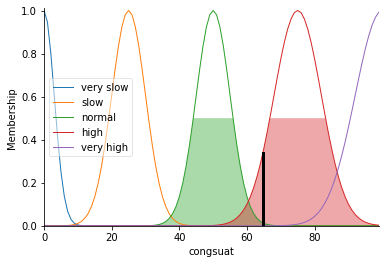

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crtl 

tgian = crtl.Antecedent(np.arange(10,180,1),'tgian')        # input
soluong = crtl.Antecedent(np.arange(200,1000,1),'soluong')  # input
congsuat = crtl.Consequent(np.arange(0,100,1),'congsuat')         # output

tgian['very fast'] = fuzz.trimf(tgian.universe,[10,10,30])
tgian['fast'] = fuzz.trimf(tgian.universe,[10,30,60])
tgian['normal'] = fuzz.trimf(tgian.universe,[30,60,120])
tgian['slow'] = fuzz.trimf(tgian.universe,[60,120,180])
tgian['very slow'] = fuzz.trimf(tgian.universe,[120,180,180])

soluong['very little'] = fuzz.trimf(soluong.universe,[200,200,400])
soluong['little'] = fuzz.trimf(soluong.universe,[200,400,600])
soluong['normal'] = fuzz.trimf(soluong.universe,[400,600,800])
soluong['much'] = fuzz.trimf(soluong.universe,[600,800,1000])
soluong['so much'] = fuzz.trimf(soluong.universe,[800,1000,1000])

congsuat['very slow'] = fuzz.gaussmf(congsuat.universe,0,3)
congsuat['slow'] = fuzz.gaussmf(congsuat.universe,25,5)
congsuat['normal'] = fuzz.gaussmf(congsuat.universe,50,5)
congsuat['high'] = fuzz.gaussmf(congsuat.universe,75,7)
congsuat['very high'] = fuzz.gaussmf(congsuat.universe,100,8)

rule1 = crtl.Rule(tgian['very fast']&soluong['very little'],congsuat['normal'])
rule2 = crtl.Rule(tgian['very fast']&soluong['little'],congsuat['high'])
rule3 = crtl.Rule(tgian['very fast']&soluong['normal'],congsuat['very high'])
rule4 = crtl.Rule(tgian['very fast']&soluong['much'],congsuat['very high'])
rule5 = crtl.Rule(tgian['very fast']&soluong['so much'],congsuat['very high'])
rule6 = crtl.Rule(tgian['fast']&soluong['very little'],congsuat['slow'])
rule7 = crtl.Rule(tgian['fast']&soluong['little'],congsuat['normal'])
rule8 = crtl.Rule(tgian['fast']&soluong['normal'],congsuat['high'])
rule9 = crtl.Rule(tgian['fast']&soluong['much'],congsuat['high'])
rule10 = crtl.Rule(tgian['fast']&soluong['so much'],congsuat['very high'])
rule11 = crtl.Rule(tgian['normal']&soluong['very little'],congsuat['very slow'])
rule12 = crtl.Rule(tgian['normal']&soluong['little'],congsuat['slow'])
rule13 = crtl.Rule(tgian['normal']&soluong['normal'],congsuat['normal'])
rule14 = crtl.Rule(tgian['normal']&soluong['much'],congsuat['high'])
rule15 = crtl.Rule(tgian['normal']&soluong['so much'],congsuat['very high'])
rule16 = crtl.Rule(tgian['slow']&soluong['very little'],congsuat['very slow'])
rule17 = crtl.Rule(tgian['slow']&soluong['little'],congsuat['slow'])
rule18 = crtl.Rule(tgian['slow']&soluong['normal'],congsuat['slow'])
rule19 = crtl.Rule(tgian['slow']&soluong['much'],congsuat['normal'])
rule20 = crtl.Rule(tgian['slow']&soluong['so much'],congsuat['high'])
rule21 = crtl.Rule(tgian['very slow']&soluong['very little'],congsuat['very slow'])
rule22 = crtl.Rule(tgian['very slow']&soluong['little'],congsuat['very slow'])
rule23 = crtl.Rule(tgian['very slow']&soluong['normal'],congsuat['very slow'])
rule24 = crtl.Rule(tgian['very slow']&soluong['much'],congsuat['slow'])
rule25 = crtl.Rule(tgian['very slow']&soluong['so much'],congsuat['normal'])

Congsuat_ctrl = crtl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Congsuat = crtl.ControlSystemSimulation(Congsuat_ctrl)
Congsuat.input['tgian'] = 50
Congsuat.input['soluong'] = 700
Congsuat.compute()
print(Congsuat.output['congsuat'])
congsuat.view(sim=Congsuat)
